## <center>Implementation of Stochastic, Batch and Mini batch grandient descent in python</center>

I have used home prices data set to implement batch and stochastic and Mini batch gradient descent in python. 

    1. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and then adjusts weights using derivaties. 
    2. In stochastic GD, we randomly picked one training sample, perform forward pass, compute the error and immidiately adjust weights. 
    3. In Mini batch GD, used random set of training samples, perform forward pass, compute the error and starts adjusting weights. 
    
So the key difference here is that to adjust weights batch GD will use all training samples, Mini batch will use set of samples and stochastic GD will use one randomly picked training sample. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df= pd.read_csv(r'C:\Users\Administrator\machine learning\home_price.csv')
df.sample(5)

,area,bedrooms,price
2,1440,3,62.0
17,1540,3,60.0
7,3300,4,155.0
11,2785,4,140.0
18,2770,3,102.0


##### Preprocessing 
Scaled area and bedrooms columns.

In [3]:
from sklearn import preprocessing

mx= preprocessing.MinMaxScaler()
my= preprocessing.MinMaxScaler()

scaled_x= mx.fit_transform(df[['area','bedrooms']])
scaled_x[:5]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ]])

In [4]:
scaled_y= my.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y[:5]

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074]])

In [5]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

### 1. Implementation of Batch Gradient Descent

In [6]:
w= np.ones(2)

In [7]:
np.dot(w, np.transpose(scaled_x))

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [8]:
def batch_gradient_descent(x,y_true,epochs,learning_rate= 0.01):
    
    no_of_features= x.shape[1]
    w= np.ones(shape= (no_of_features))
    bias= 0
    total_samples= x.shape[0]
    
    cost_list= list()
    epochs_list= list()
    
    for i in range(epochs):
           
        y_predicted= np.dot(w, x.T) + bias 
    
        wd=  -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        bias_d= -(2/total_samples)*np.sum(y_true-y_predicted)
    
        w= w-learning_rate*wd
        bias= bias-learning_rate*bias_d
        
        mse= np.mean(np.square(y_true-y_predicted))
        
        if i%10 == 0:
            cost_list.append(mse)
            epochs_list.append(i)
             
    return w, bias, mse, cost_list, epochs_list

In [9]:
w, b, cost, cost_list, epochs_list= batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

###### Plotted epoch vs cost graph to see how cost reduces as number of epoch increases

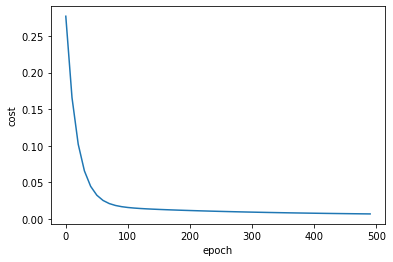

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epochs_list,cost_list)

In [11]:
my.inverse_transform([[1,0]])

array([[167.,  32.]])

In [12]:
def predict(area,bedrooms,w,b):
    scaled_x= mx.transform([[area,bedrooms]])[0]    
    scaled_price= w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    
    return my.inverse_transform([[scaled_price]])[0][0]


In [13]:
predict(1056,2,w,b)

32.0964952553193

In [14]:
predict(1800,3,w,b)

79.35396924755915

In [15]:
predict(1000,2,w,b)

30.253094462442355

### 2. Stochastic Gradient Descent Implementation

In [16]:
import random
random.randint(0,4)

4

In [17]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate= 0.01):
    
    no_of_features= x.shape[1]
    w= np.ones(shape= (no_of_features))
    bias= 0
    total_samples= x.shape[0]
    
    cost_list_sgd= list()
    epoch_list_sgd= list()
    
    for i in range(epochs):
        random_ind= random.randint(0,total_samples-1)
        sample_x= x[random_ind]
        sample_y= y_true[random_ind]
        
        y_predicted= np.dot(w, sample_x.T) + bias 
    
        wd=  -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        bias_d= -(2/total_samples)*(sample_y-y_predicted)
    
        w= w-learning_rate*wd
        bias= bias-learning_rate*bias_d
        
        mse= np.square(sample_y-y_predicted)
        
        if i%10 == 0:
            cost_list_sgd.append(mse)
            epoch_list_sgd.append(i)
             
    return w, bias, mse, cost_list_sgd, epoch_list_sgd  

In [18]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd= stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70750786, 0.67410665]), -0.22702317258124455, 0.00017123773247698816)

In [19]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

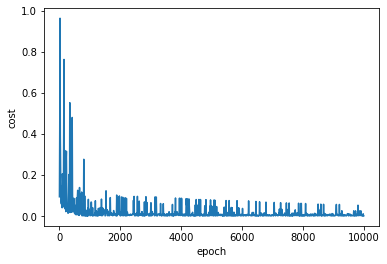

In [20]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [21]:
predict(2600,4,w_sgd, b_sgd)

128.8894497362819

### 3. Mini batch Gradient Descent Implementation

In [23]:
def mini_gradient_descent(x,y_true,epochs,learning_rate= 0.01):
    
    no_of_features= x.shape[1]
    w= np.ones(shape= (no_of_features))
    bias= 0
    total_samples= x.shape[0]
    
    cost_list_mini= list()
    epoch_list_mini= list()
    
    for i in range(epochs):
        
        random_ind1= random.randint(0,total_samples-1)
        random_ind2= random.randint(0,total_samples-1)
        if random_ind1 < random_ind2:
            sample_x= x[random_ind1:random_ind2]
            sample_y= y_true[random_ind1:random_ind2]

            y_predicted= np.dot(w, sample_x.T) + bias 

            wd=  -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
            bias_d= -(2/total_samples)*np.sum(sample_y-y_predicted)

            w= w-learning_rate*wd
            bias= bias-learning_rate*bias_d

            mse= np.mean(np.square(sample_y-y_predicted))

            if i%10 == 0:
                cost_list_mini.append(mse)
                epoch_list_mini.append(i)

    return w, bias, mse, cost_list_mini, epoch_list_mini  

In [24]:
w_mbd, b_mbd, cost_mbd, cost_list_mini, epoch_list_mini= mini_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),550)
w_mbd, b_mbd, cost_mbd

(array([0.82432441, 0.79587646]), -0.2998680882678466, 0.0060989550362421695)

In [25]:
predict(3300,4,w_mbd, b_mbd)

168.03460612889054

In [26]:
predict(1500,3,w_mbd, b_mbd)

72.10107484833425

In [27]:
predict(2770,3,w_mbd, b_mbd)

120.83570266271566

##### Plotted epoch vs cost graph to see how cost reduces as number of epoch increases

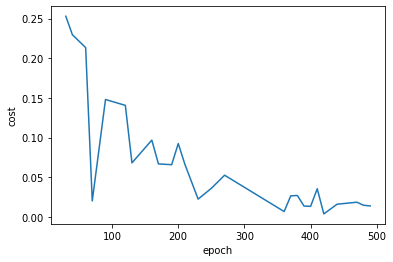

In [28]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mini,cost_list_mini)